In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

In [3]:
df = pd.read_csv("IMDB Dataset1.csv")
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


# since 35k rows are there , we will be training first 10k rows, the small sample will contain 9000 positive and 1000 negative reviews 
# we divide the dataset into 9000 positive and 1000 negative for imbalanced dataset called df_review_imb then we balance it later on in

In [4]:
df_positive = df[df['sentiment']=='positive'][:9000]
df_negative = df[df['sentiment']=='negative'][:1000]

df_review_imb = pd.concat([df_positive,df_negative ])

df_pos_half = df[df['sentiment']=='positive'][:5000]
df_neg_half = df[df['sentiment']=='negative'][:5000]

df_review_half = pd.concat([df_pos_half, df_neg_half])

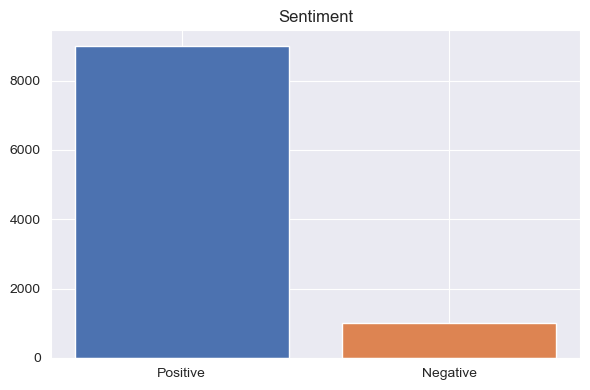

In [8]:
colors = sns.color_palette('deep')

plt.figure(figsize=(6,4), tight_layout=True)
plt.bar(x=['Positive', 'Negative'],
        height=df_review_imb.value_counts(['sentiment']),
        color=colors[:2])
plt.title('Sentiment')
plt.savefig('sentiment.png')
plt.show()


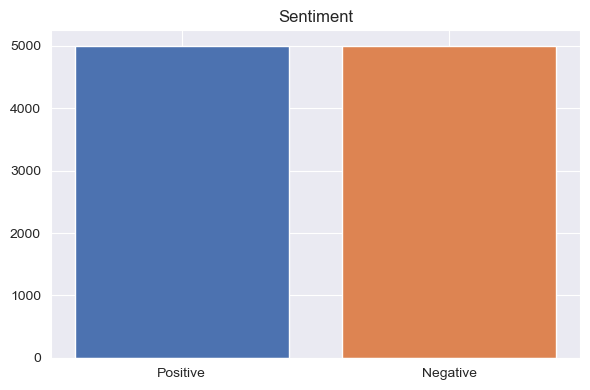

In [9]:
colors = sns.color_palette('deep')

plt.figure(figsize=(6,4), tight_layout=True)
plt.bar(x=['Positive', 'Negative'],
        height=df_review_half.value_counts(['sentiment']),
        color=colors[:2])
plt.title('Sentiment')
plt.savefig('sentiment.png')
plt.show()

## we used randomUnderSampler to balance the dataset of sentiment column. fit_sample method is taking 2 inputs review and sentiment then by rus.fit_resample(-,-) it then randomly under-samples the majority class to match the number of samples in the minority class.if 1500 are positive , 500- negative then it makes 500 ,500 equal. the next code tells imbalanced and balanced count.

## The random_state parameter in the train_test_split function is used to ensure reproducibility of the data splitting process. By setting a specific value for random_state, here 42, we ensure that the data is split in the same way every time you run the code. 

In [28]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state= 0)
df_review_bal,df_review_bal['sentiment']=rus.fit_resample(df_review_imb[['review']],df_review_imb['sentiment'])

print(df_review_bal)
print(df_review_imb.value_counts('sentiment'))
print(df_review_bal.value_counts('sentiment'))

                                                  review sentiment
3      Basically there's a family where a little boy ...  negative
7      This show was an amazing, fresh & innovative i...  negative
8      Encouraged by the positive comments about this...  negative
10     Phil the Alien is one of those quirky films wh...  negative
11     I saw this movie when I was about 12 when it c...  negative
...                                                  ...       ...
10833  Knute Rockne led an extraordinary life and his...  positive
1039   At the height of the 'Celebrity Big Brother' r...  positive
5255   This is another of Robert Altman's underrated ...  positive
12237  This movie won a special award at Cannes for i...  positive
15014  You'd be forgiven to think a Finnish director ...  positive

[2000 rows x 2 columns]
sentiment
positive    9000
negative    1000
Name: count, dtype: int64
sentiment
negative    1000
positive    1000
Name: count, dtype: int64


In [29]:
pip install wordcloud

   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   - -------------------------------------- 10.2/300.2 kB ? eta -:--:--
   ------ -------------------------------- 51.2/300.2 kB 440.4 kB/s eta 0:00:01
   ---------------------------------------- 300.2/300.2 kB 1.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [30]:
from wordcloud import WordCloud

In [32]:
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [33]:
def remove_stop_words(text):
    stop_words = set(stopwords.words('english'))
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)

# Apply the function to remove stop words from the reviews
df_review_bal['review'] = df_review_bal['review'].apply(remove_stop_words)

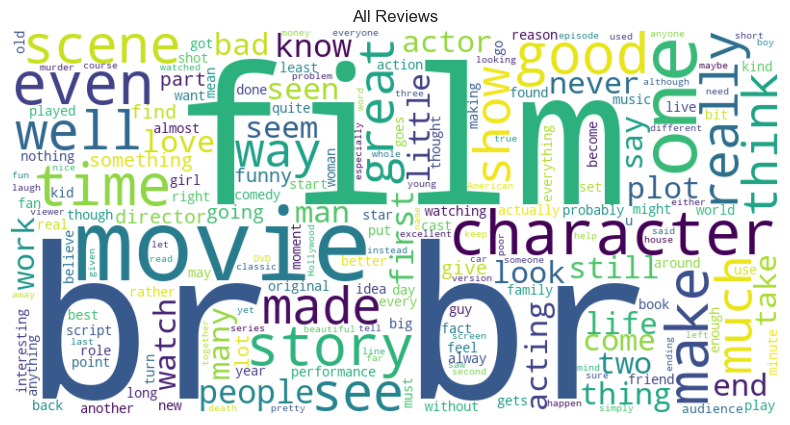

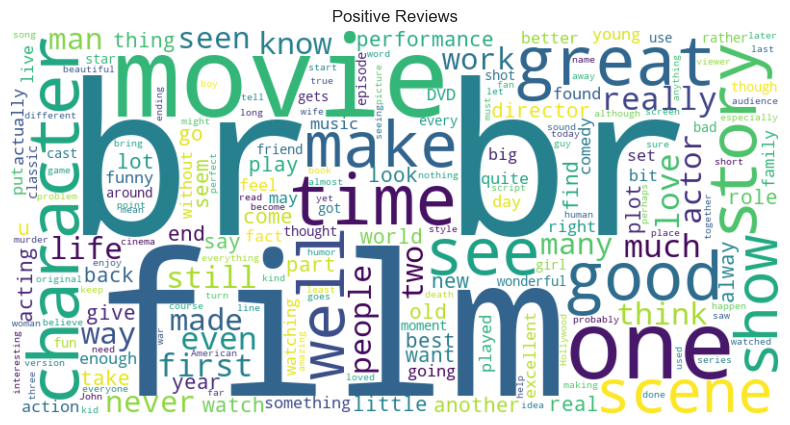

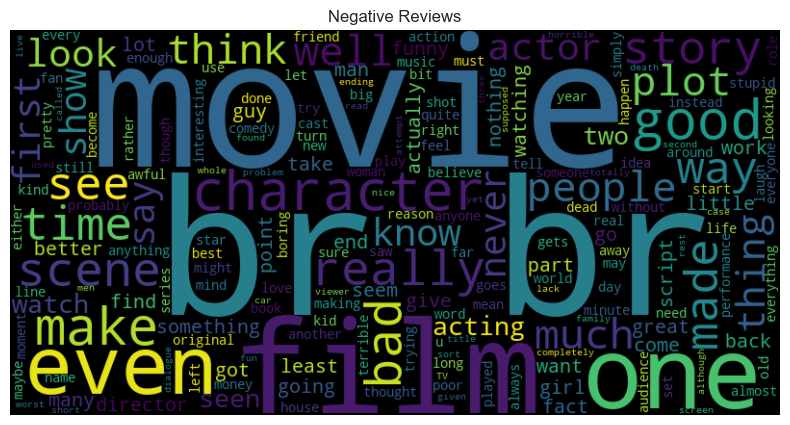

In [47]:
all_reviews = ' '.join(df_review_bal['review'])

# Separate reviews by sentiment for word cloud generation
positive_reviews = ' '.join(df_review_bal[df_review_bal['sentiment'] == 'positive']['review'])
negative_reviews = ' '.join(df_review_bal[df_review_bal['sentiment'] == 'negative']['review'])

# Create and display the word cloud for all reviews
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_reviews)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('All Reviews')
plt.axis('off')
plt.show()

# Create and display the word cloud for positive reviews
positive_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_reviews)
plt.figure(figsize=(10, 5))
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.title('Positive Reviews')
plt.axis('off')
plt.show()

# Create and display the word cloud for negative reviews
negative_wordcloud = WordCloud(width=800, height=400, background_color='black').generate(negative_reviews)
plt.figure(figsize=(10, 5))
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.title('Negative Reviews')
plt.axis('off')
plt.show()

In [35]:
from sklearn.model_selection import train_test_split

train,test = train_test_split(df_review_bal,test_size =0.20,random_state=42)

In [36]:
train_x, train_y = train['review'], train['sentiment']
test_x, test_y = test['review'], test['sentiment']

In [37]:
train_y.value_counts()

sentiment
negative    801
positive    799
Name: count, dtype: int64

# for review_half data 

In [38]:
size1 = df_review_half.size
size2 = df_review_bal.size
size3 = df_review_imb.size
print(size1)
print(size2)
print(size3)

20000
4000
20000


In [39]:
train_half,test_half = train_test_split(df_review_half,test_size =0.20,random_state=42)

In [40]:
train_x_half, train_y_half = train_half['review'], train_half['sentiment']
test_x_half, test_y_half = test_half['review'], test_half['sentiment']

In [41]:
train_y_half.value_counts()


sentiment
negative    4012
positive    3988
Name: count, dtype: int64

In [42]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Fit the TF-IDF vectorizer on the entire training dataset
tfidf = TfidfVectorizer(stop_words='english')
tfidf.fit(train_x)

# Transform both the training and testing datasets
train_x_vector = tfidf.transform(train_x)
test_x_vector = tfidf.transform(test_x)

# Transform the half datasets using the same fitted vectorizer
train_x_half_vector = tfidf.transform(train_x_half)
test_x_half_vector = tfidf.transform(test_x_half)

In [43]:
train_x_vector.shape
train_x.index

Index([ 1954,   456,  1673,  1413,   833,  1145, 12237,   708,  6019,  4397,
       ...
         212, 11287,  7039,   292, 16043, 10644, 16133,  1739,  2443,  1467],
      dtype='int64', length=1600)

In [44]:
tfidf.get_feature_names_out()

array(['00', '000', '007', ..., 'île', 'ïn', 'ünfaithful'], dtype=object)

In [45]:
pd.DataFrame.sparse.from_spmatrix(train_x_vector,
                                  index=train_x.index,
                                  columns=tfidf.get_feature_names_out())

,00,000,007,01pm,02,04,08,10,100,1000,...,zues,zzzzzzzzzzzzzzzzzz,æon,élan,émigré,être,ísnt,île,ïn,ünfaithful
1954,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
456,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.025619,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1673,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1413,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
833,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10644,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16133,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1739,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2443,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# for the half vectors 20k ones

In [46]:
pd.DataFrame.sparse.from_spmatrix(train_x_half_vector,
                                  index=train_x_half.index,
                                  columns=tfidf.get_feature_names_out())

,00,000,007,01pm,02,04,08,10,100,1000,...,zues,zzzzzzzzzzzzzzzzzz,æon,élan,émigré,être,ísnt,île,ïn,ünfaithful
8545,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3098,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3335,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2206,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3345,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.063576,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1501,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
358,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
761,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1685,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Model selection

In [89]:
from sklearn.svm import SVC
svc = SVC(kernel='linear')
svc.fit(train_x_vector, train_y)

# for half dataset:
svc.fit(train_x_half_vector, train_y_half)

SVC(kernel='linear')

In [90]:
print(svc.predict(tfidf.transform(['A good movie'])))
print(svc.predict(tfidf.transform([' I loved this movie'])))
print(svc.predict(tfidf.transform(['I did not like this movie at all I gave this movie away'])))

['positive']
['positive']
['negative']


In [91]:
SVC_ACC = svc.score(test_x_vector, test_y)
print(SVC_ACC)

0.94


Decision Tree

In [92]:
from sklearn.tree import DecisionTreeClassifier
dec_tree = DecisionTreeClassifier()
dec_tree.fit(train_x_vector, train_y)

# for half dataset
dec_tree.fit(train_x_half_vector, train_y_half)

DecisionTreeClassifier()

In [93]:
DecTree_acc = dec_tree.score(test_x_vector, test_y)
print(DecTree_acc)


0.885


Naive Bayes

In [94]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(train_x_vector.toarray(), train_y)

# for half dataset
gnb.fit(train_x_half_vector.toarray(), train_y_half)

GaussianNB()

In [95]:
GNB_acc = gnb.score(test_x_vector.toarray(), test_y)
print(GNB_acc)


0.835


Logistic Regression

In [96]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(train_x_vector,train_y)

# for half
log_reg.fit(train_x_half_vector,train_y_half)

LogisticRegression()

In [97]:
LR_acc = log_reg.score(test_x_vector, test_y)
print(LR_acc)

0.915


In [101]:
print("Accuracy :")
print("SVM: ",SVC_ACC)
print("Dec Tree: ",DecTree_acc)
print("Naive Bayes:", GNB_acc)
print("Log Reg: ",LR_acc)

Accuracy :
SVM:  0.94
Dec Tree:  0.885
Naive Bayes: 0.835
Log Reg:  0.915


# for half balanced dataset, generally models like svm perform well for imbalanced data real world data. below u can see svm scored 94 and 87 but logistic reg scored 91 for both. meaning acc of svm for imbalanced one is higher i.e performs better on imbalanced datasets. 

In [103]:
SVC_ACC_half = svc.score(test_x_half_vector, test_y_half)
DecTree_acc_half = dec_tree.score(test_x_half_vector, test_y_half)
GNB_acc_half = gnb.score(test_x_half_vector.toarray(), test_y_half)
LR_acc_half = log_reg.score(test_x_vector, test_y)
print("Accuracy when data is half")
print("SVM: ",SVC_ACC_half)
print("Dec Tree: ",DecTree_acc_half)
print("Naive Bayes: ",GNB_acc_half)
print("Log Reg: ",LR_acc_half)

Accuracy when data is half
SVM:  0.8775
Dec Tree:  0.736
Naive Bayes:  0.64
Log Reg:  0.915


Confusion Matrix:

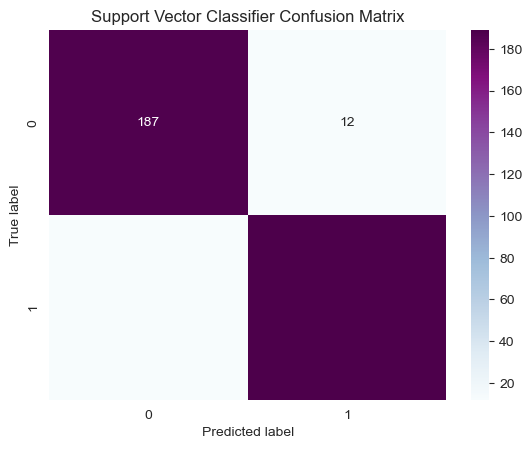

In [114]:
conf_mat = confusion_matrix(test_y,
                           svc.predict(test_x_vector),
                           labels = ['positive', 'negative'])

# Plot confusion matrices using seaborn heatmap
sns.heatmap(VC_cm, annot=True, fmt='d', cmap='BuPu')
plt.title('Support Vector Classifier Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()